# Part 4: Data Handling

## Introduction Numpy

There are many tutorials on Numpy on Pandas on Internet.

Examples:

* [NumpyPandas_course (2020), Bern](https://github.com/guiwitz/NumpyPandas_course/tree/master).
* [NumPy and Pandas Tutorial](https://cloudxlab.com/blog/numpy-pandas-introduction/)
* [Numpy and Pandas](https://faculty.washington.edu/otoomet/machinelearning-py/numpy-and-pandas.html)



#  Creating Numpy arrays

Python has many different types of data "containers": lists, dictionaries, tuples etc. However none of them allows for efficient numerical calculation, in particular not in multi-dimensional cases (think e.g. of operations on images). Numpy has been developed exactly to fill this gap. It provides a new data structure, the **numpy array**, and a large library of operations that allow to:

* generate such arrays
* combine arrays in different ways (concatenation, stacking etc.)
* modify such arrays (projection, extraction of sub-arrays etc.)
* apply mathematical operations on them

Numpy is the base of almost the entire Python scientific programming stack. Many libraries build on top of Numpy, either by providing specialized functions to operate on them (e.g. scikit-image for image processing) or by creating more complex data containers on top of it. The data science library Pandas that will also be presented in this course is a good example of this with its dataframe structures.

Example for Python list. It is versatile. But it is limited in matrix calculation processing and very slow.

In [1]:
pythonlist = [[1, '2', 3, 'otto', 5], ['second list', 3, 'sieben']]
print(pythonlist[1][2])
pythonlist[1,2]

sieben


TypeError: list indices must be integers or slices, not tuple

In [2]:
import numpy as np
np.array(pythonlist)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Numpy is for matrices with elements from same type. 

In [3]:
nlist = [[1, 2, 3, 4, 5], [10,20, 30, 40, 50 ]]
print(nlist)
print(type(nlist))
nlist2 = np.array(nlist)
display(nlist2)
print(type(nlist2))

[[1, 2, 3, 4, 5], [10, 20, 30, 40, 50]]
<class 'list'>


array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50]])

<class 'numpy.ndarray'>


In [4]:
nlist2.dtype

dtype('int32')

In [5]:
nlist2 = nlist2.astype('uint8')
print(nlist2.dtype)
nlist2 = nlist2.astype(float)
print(nlist2.dtype)
nlist2

uint8
float64


array([[ 1.,  2.,  3.,  4.,  5.],
       [10., 20., 30., 40., 50.]])

In [6]:
nlist2.shape

(2, 5)

In [7]:
nlist3 = nlist2.reshape(10)
print(nlist3.shape)
nlist3

(10,)


array([ 1.,  2.,  3.,  4.,  5., 10., 20., 30., 40., 50.])

Observe suble difference:

In [8]:
nlist4 = nlist2.reshape(1,10)
print(nlist4.shape)
nlist4

(1, 10)


array([[ 1.,  2.,  3.,  4.,  5., 10., 20., 30., 40., 50.]])

Two different data types!

Their existance has historical reasons. The type `np.matrix` was intended to reduce the confusion but it is not used in practice.

In [9]:
nlist[0,2:]

TypeError: list indices must be integers or slices, not tuple

In [10]:
nlist2[0,2:]

array([3., 4., 5.])

In [11]:
nlist2[0,-3:]

array([3., 4., 5.])

In [12]:
nlist2[:,0:-1]

array([[ 1.,  2.,  3.,  4.],
       [10., 20., 30., 40.]])

In [13]:
za = np.zeros((2,3)).astype(int)
za

array([[0, 0, 0],
       [0, 0, 0]])

Numpy has its own calculation rules. They follow more common sense than mathematical rules.

In [14]:
za + 1

array([[1, 1, 1],
       [1, 1, 1]])

In [15]:
(za + 1) * 3

array([[3, 3, 3],
       [3, 3, 3]])

In [16]:
(za + 1)/3

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [17]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [18]:
range(3)

range(0, 3)

In [19]:
list(range(3))

[0, 1, 2]

In [20]:
np.arange(0,4,1)

array([0, 1, 2, 3])

In [21]:
np.linspace(0,3,4)

array([0., 1., 2., 3.])

In [22]:
np.linspace(0,4,4)

array([0.        , 1.33333333, 2.66666667, 4.        ])

Random numbers: does not exist on deterministic computers.  
Only pseudo - random generators.

Initializing random generators:

In [23]:
rng = np.random.default_rng(42)
rng2 = np.random.default_rng(43)

In [24]:
rng.random((3,2))

array([[0.77395605, 0.43887844],
       [0.85859792, 0.69736803],
       [0.09417735, 0.97562235]])

In [25]:
rng.random((3,2))

array([[0.7611397 , 0.78606431],
       [0.12811363, 0.45038594],
       [0.37079802, 0.92676499]])

In [26]:
rng = np.random.default_rng(42)
rng.random((3,2))

array([[0.77395605, 0.43887844],
       [0.85859792, 0.69736803],
       [0.09417735, 0.97562235]])

In [27]:
rng.normal(0,1,30)

array([ 0.1278404 , -0.31624259, -0.01680116, -0.85304393,  0.87939797,
        0.77779194,  0.0660307 ,  1.12724121,  0.46750934, -0.85929246,
        0.36875078, -0.9588826 ,  0.8784503 , -0.04992591, -0.18486236,
       -0.68092954,  1.22254134, -0.15452948, -0.42832782, -0.35213355,
        0.53230919,  0.36544406,  0.41273261,  0.430821  ,  2.1416476 ,
       -0.40641502, -0.51224273, -0.81377273,  0.61597942,  1.12897229])

In [28]:
normaldata = rng.normal(0,1,30)

# simple approach does not work. Wait for Pandas!

# normaldata.hist()
# save(normaldata)
# load(normaldata)


### Images are arrays!

This tutorial skips deeper understanding (eg: unsignet 8 bit integer format or [0..1] floating number, one or three or four layers for grey or color images; png, jpeg, tif... formats etc).

In [2]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio


# Save an array as image...

mylineimage = (np.eye(32)*255).astype('uint8')
mylineimage[:10,:10]=255
iio.imwrite('demoimage.png', mylineimage)
mylineimage

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255]], dtype=uint8)

In [5]:
#... and reload image as array.

myim2 = iio.imread('demoimage.png')
myim2

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255]], dtype=uint8)

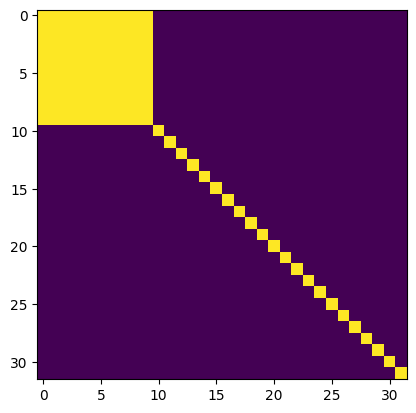

In [6]:
# ... plot it.

plt.imshow(myim2)
plt.show()